In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib inline

In [51]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(4,5)}, 
    style="white"
)

## Datasets

In [26]:
admissions = pd.read_csv("ADMISSIONS.csv")
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_DEPARTMENT,DISCHARGE_DEPARTMENT,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,ICD10_CODE_CN,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,26,100000,2098-11-09 18:30:55,2098-11-14 09:18:00,NaN,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2098-11-09 18:30:55,2098-11-14 09:18:00,肠粘膜炎,K52.901,0,0
1,2,28,100001,2104-09-03 10:36:47,2104-09-12 14:51:00,2104-09-12 14:51:00,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2104-09-03 10:36:47,2104-09-12 14:51:00,心肌炎,I51.403,1,0
2,3,29,100002,2062-11-29 20:52:52,2062-12-07 14:27:00,NaN,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2062-11-29 20:52:52,2062-12-07 14:27:00,溺水,T75.101,0,0
3,4,30,100003,2098-11-21 15:38:47,2098-11-26 01:33:00,2098-11-26 01:33:00,General ICU,General ICU,Discount,CHN,Not specified,Single,Han ethnic,2098-11-21 15:38:47,2098-11-26 01:33:00,NaN,NaN,1,0
4,5,31,100004,2071-11-13 19:43:13,2071-11-15 13:40:00,2071-11-15 13:40:00,General ICU,General ICU,Self Pay,CHN,Not specified,Single,Han ethnic,2071-11-13 19:43:13,2071-11-15 13:40:00,腹泻病,K52.904,1,0


In [27]:
chartevents = pd.read_csv("CHARTEVENTS.csv")
chartevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,VALUE,VALUENUM,VALUEUOM
0,1,11062,111384,NaN,1008,2077-05-12 06:48:00,2077-05-12 06:48:00,596.0,596.0,ml
1,2,9349,109531,210016.0,1003,2079-01-06 13:53:30,2079-01-06 13:53:30,110.0,110.0,bpm
2,3,11062,111384,211848.0,1004,2077-05-25 21:59:51,2077-05-25 21:59:51,31.0,31.0,bpm
3,4,12441,112881,213285.0,1031,2107-08-18 06:36:47,2107-08-18 06:36:47,30.0,30.0,°C
4,5,9349,109531,210016.0,1001,2079-01-06 13:53:30,2079-01-06 13:53:30,37.4,37.4,°C


In [57]:
d_icd_diagnosis = pd.read_csv("D_ICD_DIAGNOSES.csv")
d_icd_diagnosis.head()

,ROW_ID,ICD10_CODE_CN,ICD10_CODE,TITLE_CN,TITLE
0,1,A00.000,A00.0,古典生物型霍乱,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,2,A00.100,A00.1,埃尔托型霍乱,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,3,A00.900,A00.9,霍乱,"Cholera, unspecified"
3,4,A01.000,A01.0,伤寒,Typhoid fever
4,5,A01.001,A01.0,伤寒,Typhoid fever


In [58]:
d_items = pd.read_csv("D_ITEMS.csv")
d_items.head()

,ROW_ID,ITEMID,LABEL_CN,LABEL,LINKSTO,CATEGORY,UNITNAME
0,1,1001,体温,Temperature,chartevents,Routine Vital Signs,°C
1,2,1002,脉搏,Pulse,chartevents,NaN,bpm
2,3,1003,心率,Heart Rate,chartevents,Routine Vital Signs,bpm
3,4,1004,呼吸,Respiratory Rate,chartevents,Routine Vital Signs,insp/min
4,5,1006,血氧饱和度,Oxygen saturation,chartevents,Routine Vital Signs,%


In [59]:
d_labitems = pd.read_csv("D_LABITEMS.csv")
d_labitems.head()

,ROW_ID,ITEMID,LABEL_CN,LABEL,FLUID,CATEGORY,LOINC_CODE
0,1,5002,嗜酸性粒细胞,Eosinophils,Blood,Hematology,711-2
1,2,5005,中性粒细胞%(*),Neutrophils %,Blood,Hematology,NaN
2,3,5006,淋巴细胞%(*),"Lymphocytes, Percent",Blood,Hematology,26478-8
3,4,5008,巨噬细胞%(*),Macrophage%,Blood,Chemistry,NaN
4,5,5010,其它细胞%(*),Other cells %,NaN,NaN,NaN


In [31]:
diagnoses_icd = pd.read_csv("DIAGNOSES_ICD.csv.gz", compression = 'gzip')
diagnoses_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD10_CODE_CN
0,1,12575,113742,1,Q43.901
1,2,614,100603,1,G04.916
2,3,1888,101880,1,Q40.001
3,4,8792,108934,1,S02.902
4,5,10368,111492,1,J18.900


In [32]:
emr_symptoms = pd.read_csv("EMR_SYMPTOMS.csv")
emr_symptoms.head()

,ROW_ID,SUBJECT_ID,HADM_ID,EMR_ID,RECORDTIME,SYMPTOM_NAME_CN,SYMPTOM_NAME,SYMPTOM_ATTRIBUTE
0,1,12104,112523,3930272,2100-07-02 13:04:24,咳嗽,cough,+
1,2,12104,112523,3930272,2100-07-02 13:04:24,胃纳可,good appetite,+
2,3,12104,112523,3930272,2100-07-02 13:04:24,神清,good spirit,+
3,4,12104,112523,3930272,2100-07-02 13:04:24,精神软,listless,+
4,5,12104,112523,3930272,2100-07-02 13:04:24,心律齐,regular heart rhythm,+


In [33]:
icustays = pd.read_csv("ICUSTAYS.csv")
icustays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,1,26,100000,200532,General ICU,General ICU,340,340,2098-11-09 18:30:55,2098-11-14 09:18:00,4.6167
1,2,28,100001,200533,General ICU,General ICU,340,340,2104-09-03 10:36:46,2104-09-12 14:51:00,9.1771
2,3,29,100002,200534,General ICU,General ICU,340,340,2062-11-29 20:52:52,2062-12-07 14:27:00,7.7326
3,4,30,100003,200535,General ICU,General ICU,340,340,2098-11-21 15:38:47,2098-11-26 01:33:00,4.4132
4,5,31,100004,200536,General ICU,General ICU,340,340,2071-11-13 19:43:12,2071-11-15 13:40:00,1.7479


In [34]:
inputevents = pd.read_csv("INPUTEVENTS.csv")
inputevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,AMOUNT,AMOUNTUOM,STORETIME
0,1,2946,103020,203485.0,2092-01-06 07:07:55,355.0,ml,2092-01-06 07:07:55
1,2,2993,103065,203530.0,2098-04-06 06:11:48,336.0,ml,2098-04-06 06:11:48
2,3,2981,103053,203518.0,2102-01-15 06:12:06,72.0,ml,2102-01-15 06:12:06
3,4,2989,103061,203526.0,2097-02-14 06:52:28,1382.0,ml,2097-02-14 06:52:28
4,5,2894,102970,203435.0,2085-05-12 06:12:16,480.0,ml,2085-05-12 06:12:16


In [35]:
labevents = pd.read_csv("LABEVENTS.csv")
labevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,1,3665,103732,5244,2077-10-25 09:23:38,27.2,27.20,mmHg,l
1,2,3665,103732,5247,2077-10-25 09:23:38,0.86,0.86,NaN,z
2,3,3665,103732,5248,2077-10-25 09:23:38,22.2,22.20,mmol/L,z
3,4,3665,103732,5249,2077-10-25 09:23:38,-0.3,-0.30,mmol/L,z
4,5,3665,103732,5250,2077-10-25 09:23:38,61.4,61.40,%,h


In [36]:
microbiologyevents = pd.read_csv("MICROBIOLOGYEVENTS.csv")
microbiologyevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,1,4981,104977,2066-10-09 11:29:00,LIS031294+LIS0204+LIS0320,"血培养含真菌(阳性加药敏),常规药敏定量试验(MIC),耐甲氧西林葡萄球菌检测MRS.AMRS",MIC310,人葡萄球菌,MIC473,莫西沙星,>=8,>=,8.00,R
1,2,4981,104977,2066-10-09 11:29:00,LIS031294+LIS0204+LIS0320,"血培养含真菌(阳性加药敏),常规药敏定量试验(MIC),耐甲氧西林葡萄球菌检测MRS.AMRS",MIC310,人葡萄球菌,MIC470,克林霉素,<=0.25,<=,0.25,R
2,3,4981,104977,2066-10-09 11:29:00,LIS031294+LIS0204+LIS0320,"血培养含真菌(阳性加药敏),常规药敏定量试验(MIC),耐甲氧西林葡萄球菌检测MRS.AMRS",MIC310,人葡萄球菌,MIC1015,喹奴普汀/达福普汀,<=0.25,<=,0.25,S
3,4,4981,104977,2066-10-09 11:29:00,LIS031294+LIS0204+LIS0320,"血培养含真菌(阳性加药敏),常规药敏定量试验(MIC),耐甲氧西林葡萄球菌检测MRS.AMRS",MIC310,人葡萄球菌,MIC1215,替加环素,<=0.12,<=,0.12,S
4,5,4981,104977,2066-10-09 11:29:00,LIS031294+LIS0204+LIS0320,"血培养含真菌(阳性加药敏),常规药敏定量试验(MIC),耐甲氧西林葡萄球菌检测MRS.AMRS",MIC1703,革兰阳性球菌（G+C）,,,NaN,NaN,NaN,


In [37]:
or_exam_reports = pd.read_csv("OR_EXAM_REPORTS.csv")
or_exam_reports.head()

,ROW_ID,SUBJECT_ID,HADM_ID,EXAMTIME,REPORTTIME,EXAM_ITEM_TYPE_NAME,EXAM_ITEM_NAME,EXAM_PART_NAME
0,1,1491,101788,2075-04-08 07:44:45,2075-04-08 07:45:08,CR,DR,Chest
1,2,7525,107581,2091-09-08 10:25:15,2091-09-08 14:37:55,CR,X-rays,Chest
2,3,8811,108952,2115-11-13 10:57:33,2115-11-13 10:56:41,CR,X-rays,Chest
3,4,8423,108545,2106-12-17 19:50:59,2106-12-17 22:11:52,CR,X-rays,Chest
4,5,8232,108356,NaN,2114-09-27 15:39:25,GM,Routine Pathologic Examination,NaN


In [38]:
outputevents = pd.read_csv("OUTPUTEVENTS.csv")
outputevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME
0,1,8800,108941,NaN,2080-11-15 21:11:00,1034,39.0,ml,2080-11-15 21:11:00
1,2,8800,108941,NaN,2080-11-17 18:00:00,1034,6.0,ml,2080-11-17 18:00:00
2,3,8800,108941,NaN,2080-11-22 02:44:00,1034,30.0,ml,2080-11-22 02:44:00
3,4,8800,108941,NaN,2080-11-21 15:05:00,1034,36.0,ml,2080-11-21 15:05:00
4,5,8800,108941,NaN,2080-11-21 06:11:00,1034,10.0,ml,2080-11-21 06:11:00


In [39]:
patients = pd.read_csv("PATIENTS.csv")
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,EXPIRE_FLAG
0,1,2,M,2068-11-30 00:00:00,2081-09-28 10:06:00,1
1,2,9,M,2104-03-09 00:00:00,NaN,0
2,3,56,F,2110-01-08 13:40:00,NaN,0
3,4,79,F,2094-08-25 00:00:00,NaN,0
4,5,96,M,2050-12-17 00:00:00,NaN,0


In [40]:
prescriptions = pd.read_csv("PRESCRIPTIONS.csv")
prescriptions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_NAME,DRUG_NAME_EN,PROD_STRENGTH,DRUG_NAME_GENERIC,DOSE_VAL_RX,DOSE_UNIT_RX,DRUG_FORM
0,1,29,100002,200534.0,2062-11-29 21:15:00,2062-12-07 14:03:46,5％碳酸氢钠注射液,5% Sodium Bicarbonate Injection,10ml*5,NaN,10.0,ml,injection
1,2,29,100002,200534.0,2062-11-29 21:15:00,2062-12-07 14:03:31,0.9％氯化钠注射液,0.9% Sodium Chloride Injection,500ml,NaN,500.0,ml,injection
2,3,29,100002,200534.0,2062-11-29 21:15:00,2062-12-03 14:24:14,灭菌注射用水,Sterile Water Injection,500ml,NaN,1000.0,ml,injection
3,4,29,100002,200534.0,2062-11-29 21:15:00,2062-12-07 14:02:58,0.9％氯化钠注射液,0.9% Sodium Chloride Injection,10ml(Bottle),NaN,0.5,ml,injection
4,5,29,100002,200534.0,2062-11-29 21:34:47,2062-12-07 14:02:54,(4:1)葡萄糖氯化钠注射液,(4:1)Glucose and Sodium Chloride Injection,50ml(Bag),NaN,20.0,ml,injection


In [41]:
surgery_vital_signs = pd.read_csv("SURGERY_VITAL_SIGNS.csv")
surgery_vital_signs.head()

,ROW_ID,SUBJECT_ID,HADM_ID,VISIT_ID,OPER_ID,ITEM_NO,MONITORTIME,ITEMID,VALUE
0,1,4531,104527,1,1,9,2073-09-01 14:50:00,SV1,148
1,2,4531,104527,1,1,10,2073-09-01 14:55:00,SV1,145
2,3,4531,104527,1,1,12,2073-09-01 15:05:00,SV1,150
3,4,4531,104527,1,1,13,2073-09-01 15:05:00,SV1,147
4,5,4322,104884,2,4,15,2097-07-24 15:30:00,SV1,119


## Patient Dataset

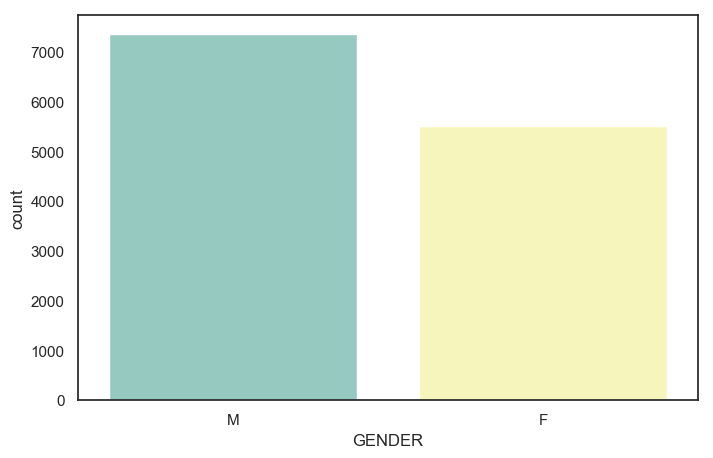

In [79]:
sns.countplot(patients['GENDER'], palette="Set3")
plt.show()

In [54]:
print(f"Total number of patients: {len(patients)}")
print(f"Male: {len(patients[patients['GENDER'] == 'M'])}")
print(f"Female: {len(patients[patients['GENDER'] == 'F'])}")

Total number of patients: 12881
Male: 7366
Female: 5515


In [69]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(8,5)}, 
    style="white"
)

## D_ITEMS Dataset

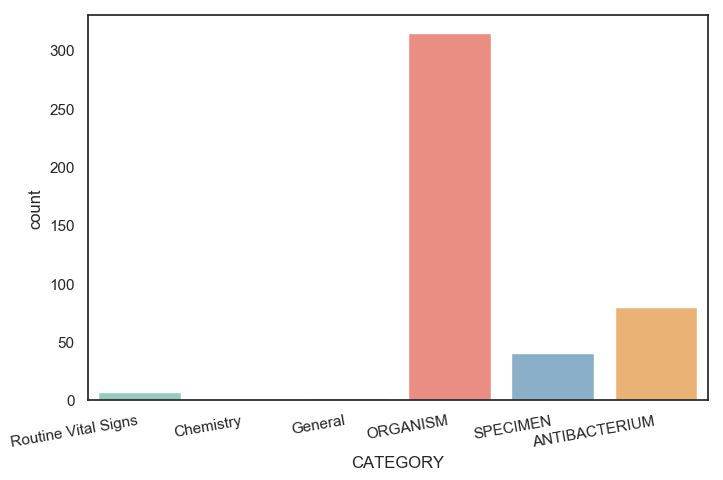

In [86]:
plot = sns.countplot(d_items['CATEGORY'], palette="Set3")
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=10, horizontalalignment='right')
plt.show()

## D_LABITEMS Dataset

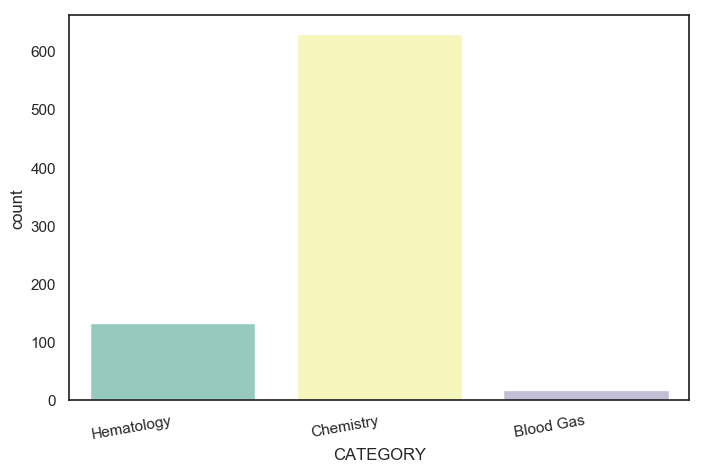

In [87]:
plot = sns.countplot(d_labitems['CATEGORY'], palette="Set3")
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=10, horizontalalignment='right')
plt.show()